## 词袋模型（Bag of Words Model）

** 词袋模型的概念 **

先来看张图，从视觉上感受一下词袋模型的样子。
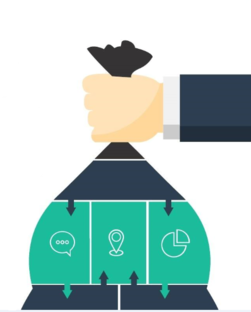

> 词袋模型看起来好像一个口袋把所有词都装进去，但却不完全如此。在自然语言处理和信息检索中作为一种简单假设，词袋模型把文本（段落或者文档）被看作是无序的词汇集合，忽略语法甚至是单词的顺序，把每一个单词都进行统计，同时计算每个单词出现的次数，常常被用在文本分类中，如贝叶斯算法、LDA 和 LSA 等。

In [1]:
import jieba
#定义停用词、标点符号
punctuation = ["，","。", "：", "；", "？"]
#定义语料
content = ["机器学习带动人工智能飞速的发展。",
           "深度学习带动人工智能飞速的发展。",
           "机器学习和深度学习带动人工智能飞速的发展。"
          ]

In [5]:
# 分词
sentences = [jieba.lcut(cnt) for cnt in content]

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/ns/m8xd7fv97296z3d_wx3qfbtw0000gn/T/jieba.cache
Loading model cost 0.980 seconds.
Prefix dict has been built succesfully.


In [57]:
tokenized = [
    [word for word in sentence if word not in punctuation] for sentence in sentences
]
print(tokenized)

[['机器', '学习', '带动', '人工智能', '飞速', '的', '发展'], ['深度', '学习', '带动', '人工智能', '飞速', '的', '发展'], ['机器', '学习', '和', '深度', '学习', '带动', '人工智能', '飞速', '的', '发展']]


In [80]:
# 求并集
bag_of_words = list(set([
    word for sentence in sentences for word in sentence if word not in punctuation
]))
print(bag_of_words)
bag_of_word2vec = [
    [1 if token in sent else 0 for token in bag_of_words] for sent in tokenized
]
print(bag_of_word2vec)

['学习', '人工智能', '深度', '飞速', '带动', '机器', '的', '和', '发展']
[[1, 1, 0, 1, 1, 1, 1, 0, 1], [1, 1, 1, 1, 1, 0, 1, 0, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1]]


In [81]:
from gensim import corpora
import gensim

dictionary = corpora.Dictionary(tokenized)
dictionary.save('deerwester.dict')
print(dictionary)
print(dictionary.token2id)

Dictionary(9 unique tokens: ['人工智能', '发展', '学习', '带动', '机器']...)
{'人工智能': 0, '发展': 1, '学习': 2, '带动': 3, '机器': 4, '的': 5, '飞速': 6, '深度': 7, '和': 8}


In [82]:
corpus = [dictionary.doc2bow(sentence) for sentence in sentences]
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)], [(0, 1), (1, 1), (2, 1), (3, 1), (5, 1), (6, 1), (7, 1)], [(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]]


## 单词向量模型

> Word2Vec 是 Google 团队2013年推出的，自提出后被广泛应用在自然语言处理任务中，并且受到它的启发，后续出现了更多形式的词向量模型。Word2Vec 主要包含两种模型：Skip-Gram 和 CBOW，值得一提的是，Word2Vec 词向量可以较好地表达不同词之间的相似和类比关系。

In [84]:
from gensim.models import Word2Vec  
import jieba
#定义停用词、标点符号
punctuation = [",","。", ":", ";", ".", "'", '"', "’", "?", "/", "-", "+", "&", "(", ")"]
sentences = [
"长江是中国第一大河，干流全长6397公里（以沱沱河为源），一般称6300公里。流域总面积一百八十余万平方公里，年平均入海水量约九千六百余亿立方米。以干流长度和入海水量论，长江均居世界第三位。",
"黄河，中国古代也称河，发源于中华人民共和国青海省巴颜喀拉山脉，流经青海、四川、甘肃、宁夏、内蒙古、陕西、山西、河南、山东9个省区，最后于山东省东营垦利县注入渤海。干流河道全长5464千米，仅次于长江，为中国第二长河。黄河还是世界第五长河。",
"黄河,是中华民族的母亲河。作为中华文明的发祥地,维系炎黄子孙的血脉.是中华民族民族精神与民族情感的象征。",
"黄河被称为中华文明的母亲河。公元前2000多年华夏族在黄河领域的中原地区形成、繁衍。",
"在兰州的“黄河第一桥”内蒙古托克托县河口镇以上的黄河河段为黄河上游。",
"黄河上游根据河道特性的不同，又可分为河源段、峡谷段和冲积平原三部分。 ",
"黄河,是中华民族的母亲河。"
]

In [ ]:
# 分词和去停止词
